In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt


mnist=tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9
(X_train,y_train), (X_test,y_test)=mnist.load_data()
#print(X_train[0])
x_train=X_train/255
x_test=X_test/255
print(x_train.shape)
print(x_train[0].shape)
#x_train=tf.keras.utils.normalize(X_train,axis=1)
#x_test=tf.keras.utils.normalize(X_test,axis=1)
model=tf.keras.models.Sequential()

#model.add(LSTM(128,input_shape=(x_train.shape[1:]),activation='relu',return_sequences=True))
#model.add(CuDNNLSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
## in tensorflow 2.0, without activation='relu' LSTM will use build-in CuDNNLSTM to speedup on GPU
model.add(LSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))

#model.add(LSTM(128,activation='relu'))
## in tensoflow 2.0, without activation='relu' LSTM will use build-in CuDNNLSTM to speedup on GPU
model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=1e-3,decay=1e-5)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))
model.save("RNN_minist.model")
predictions=model.evaluate(x_test)
print(y_test[0])
print(len(predictions))
print(predictions)
plt.imshow(x_test[0])
plt.show()

(60000, 28, 28)
(28, 28)
Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.8735WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f74345080e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 19s 9ms/step - loss: 0.4182 - accuracy: 0.8735 - val_loss: 0.1320 - val_accuracy: 0.9609
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1282 - accuracy: 0.9654 - val_loss: 0.0916 - val_accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0887 - accuracy: 0.9766 - val_loss: 0.0793 - val_accuracy: 0.9772


INFO:tensorflow:Assets written to: RNN_minist.model/assets


INFO:tensorflow:Assets written to: RNN_minist.model/assets


313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
7


AttributeError: ignored

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7
10000
7


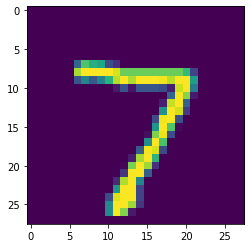

In [23]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.load_model("RNN_minist.model")
predictions=model.predict(x_test)
print(y_test[0])
print(len(predictions))
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()

In [8]:
!pip install  --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

mnist=tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9
(X_train,y_train), (X_test,y_test)=mnist.load_data()
#print(X_train[0])
x_train=X_train/255
x_test=X_test/255
print(x_train.shape)
print(x_train[0].shape)
#x_train=tf.keras.utils.normalize(X_train,axis=1)
#x_test=tf.keras.utils.normalize(X_test,axis=1)
model=tf.keras.models.Sequential()

model.add(LSTM(128,input_shape=(x_train.shape[1:]),activation='relu',return_sequences=True))
#model.add(CuDNNLSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
## in tensorflow 2.0, without activation='relu' LSTM will use build-in CuDNNLSTM to speedup on GPU
#model.add(LSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
## in tensoflow 2.0, without activation='relu' LSTM will use build-in CuDNNLSTM to speedup on GPU
#model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=1e-3,decay=1e-5)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))


(60000, 28, 28)
(28, 28)
Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.7752WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f74ccea1f80> and will run it as-is.
Please report this to the TensorFlow team. W